<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/HW3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
model_selection.KFold

from sklearn.model_selection import KFold
KFold


# Import cancer data set
data = pd.read_csv("cancer.csv")
print(data.head())

# Seperating columns
y1 = data.values[:, 1]        # diagnoses
x1 = data.values[:, 2:30]     # All inputs

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# Seperating training and validation for cancer
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.20, random_state = 0)

# Scale cancer data
from sklearn.preprocessing import StandardScaler
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

# Logistic Regression of cancer data
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(x1_train, y1_train)



LogisticRegression(random_state=0)

In [ ]:
# Predicting cancer test output
y1_pred = classifier1.predict(x1_test)
y1_pred[0:9]

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [ ]:
# Confusion matrix to check cancer accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y1_test, y1_pred)
cnf_matrix1

array([[65,  2],
       [ 3, 44]])

In [ ]:
# Evaluation of cancer model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred, average='macro'))
print("Recall:",metrics.recall_score(y1_test, y1_pred, average='macro'))
print("F1 score:",metrics.f1_score(y1_test, y1_pred, average='macro'))

Accuracy: 0.956140350877193
Precision: 0.9562020460358056
Recall: 0.9531597332486503
F1 score: 0.9545997610513739


Text(0.5, 427.9555555555555, 'Predicted label')

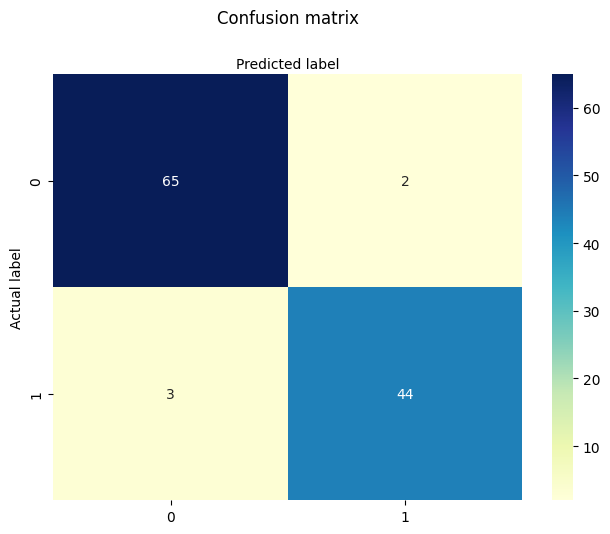

In [ ]:
# Creating visual cancer confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# ###Adding weight penalty and repeating regression###

from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(x1_train)

# Apply the scaler to the test data
X_test_std = sc.transform(x1_test)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x1_train, y1_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_std, y1_train))
    print('Test accuracy:', clf.score(X_test_std, y1_test))
    print('')

C: 10
Training accuracy: 0.9868131868131869
Test accuracy: 0.956140350877193

C: 1
Training accuracy: 0.9912087912087912
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 0.001
Training accuracy: 0.6373626373626373
Test accuracy: 0.5877192982456141



In [ ]:
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, x1, y1, cv=Kfold)

# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


NameError: ignored

In [ ]:
# Construct a confusion matrix
test_size = 0.33
seed = 0
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(x1_train, y1_train)
predicted = model.predict(x1_test)
matrix = confusion_matrix(y1_test, predicted)
print(matrix)

[[115   6]
 [  1  66]]


In [ ]:
test_size = 0.33
seed = 0
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(x1_train, y1_train)
predicted = model.predict(x1_test)
report = classification_report(y1_test, predicted)
print(report)

              precision    recall  f1-score   support

           B       0.99      0.95      0.97       121
           M       0.92      0.99      0.95        67

    accuracy                           0.96       188
   macro avg       0.95      0.97      0.96       188
weighted avg       0.96      0.96      0.96       188



Text(0.5, 427.9555555555555, 'Predicted label')

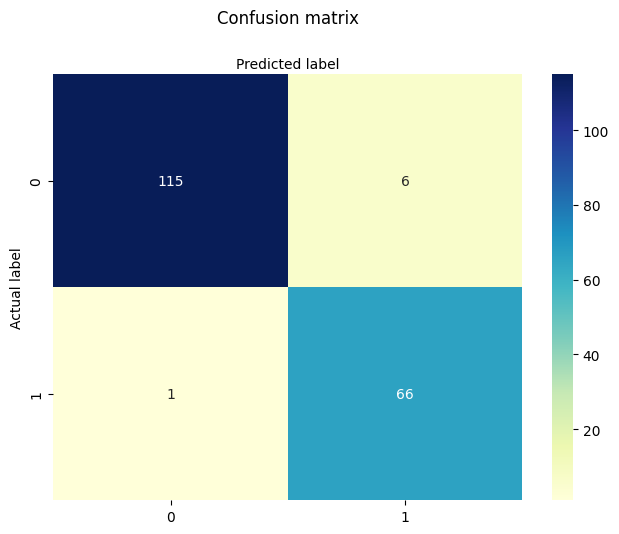

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
